# Mini Project 1
<div dir=rtl>

## محمدمهدی معاضدی

## 99304**73**
از انجا که شماره دانشجویی اینجانب 9930473 می باشد برای Random State را برابر با دو رقم آخر شمارۀ دانشجویی خود در یعنی 73 درنظر میگیریم.
</div>

In [50]:
!pip install opendatasets
import warnings
# Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import opendatasets as od

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

<div dir=rtl>

# پرسش اول
  برای حل این سؤال از این مجموعه داده استفاده می کنیم. فایل داده را دانلود کرده و آن را در محیط پایتون بارگذاری کنید..
</div>

##Loading the Data

In [52]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download'
# Using opendatasets let's download the data sets
#{"username":"mehdimoazedy","key":"34273bbc76081a4f5e3d0b54a221dc70"}
od.download(dataset)

Skipping, found downloaded files in "./credit-card-customers" (use force=True to force download)


In [53]:
df = pd.read_csv('credit-card-customers/BankChurners.csv')
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","CLIENTNUM"],axis=1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<div dir =rtl>

- درباره این مجموعه داده به صورت خلاصه توضیح دهید.

- ویژگی های ۲ موجود در این مجموعه داده را نام ببرید.

-  چه تعداد نمونه در این مجموعه داده موجود است؟


</div>

## 1.1 Dataset Features and properties

In [54]:
print(f"number of samples: {len(df)}")
print('\n')
print(f"{len(df.columns)}features:")
features = list(df.columns)
print(*features,sep="\t")
print('\n')
df.describe()

number of samples: 10127


20features:
Attrition_Flag	Customer_Age	Gender	Dependent_count	Education_Level	Marital_Status	Income_Category	Card_Category	Months_on_book	Total_Relationship_Count	Months_Inactive_12_mon	Contacts_Count_12_mon	Credit_Limit	Total_Revolving_Bal	Avg_Open_To_Buy	Total_Amt_Chng_Q4_Q1	Total_Trans_Amt	Total_Trans_Ct	Total_Ct_Chng_Q4_Q1	Avg_Utilization_Ratio




,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<div dir = rtl>

با استفاده از تابع sns.pairplot پخش داده را نمایش دهید.

</div>

## 1.2 Plot pairwise relationships in a dataset

Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book


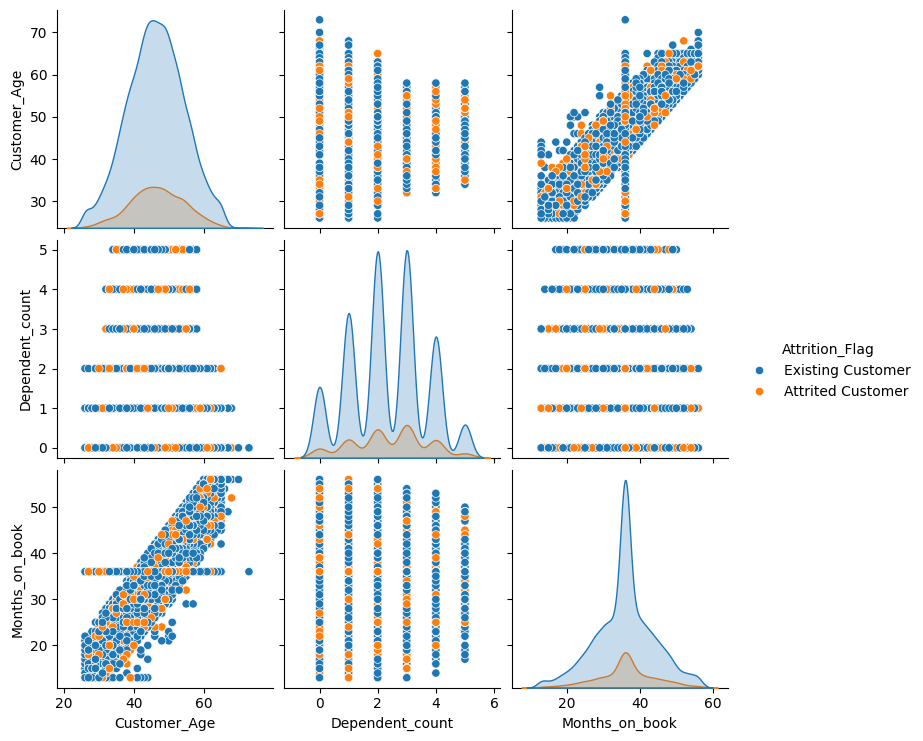

In [55]:
plot_columns= ["Attrition_Flag",'Customer_Age','Gender',"Dependent_count",
              "Education_Level","Marital_Status","Income_Category",
              "Card_Category","Months_on_book"]
print(*plot_columns, sep="\n")
sns.pairplot(df[plot_columns],hue="Attrition_Flag")
# df.plot()

<div dir=rtl>
همبستگی موجود میان ویژگی های مختلف را به صورت نقشه حرارتی نشان دهید.

</div>

## 1.3 plotting Correlation with heatmap



### determin cathegorical and numeric features

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfclone = df.copy(True)

for col in df.select_dtypes(include=['object']).columns:
    dfclone[col] = le.fit_transform(df[col])

### Plot

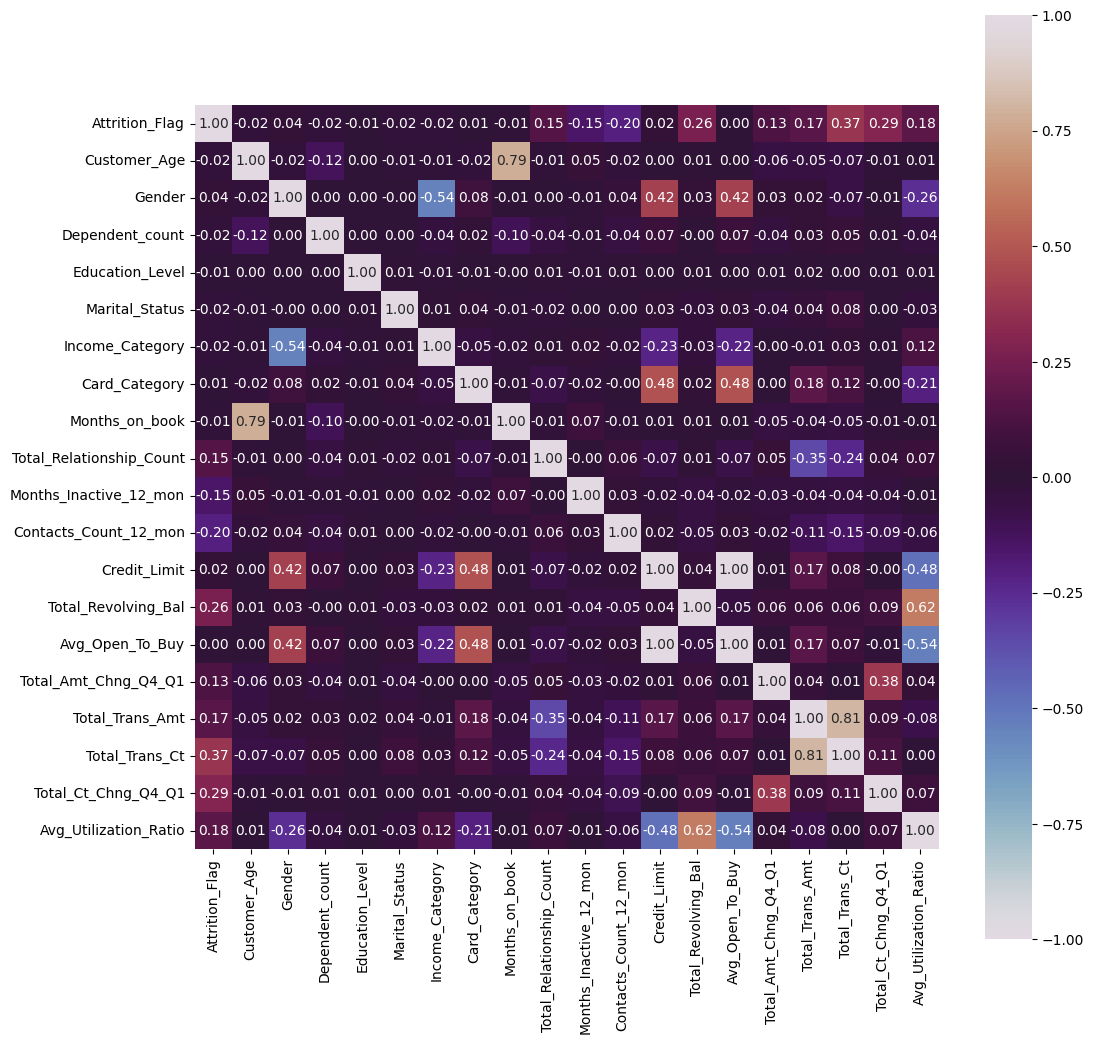

In [57]:
corelation = dfclone.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corelation, cmap = 'twilight', vmin = -1, vmax = 1, center = 0,
            annot = True, fmt = ".2f", square = True, )

plt.show()
plt.close()

<div dir=rtl>
آیا در میان داده های موجود، داده Nan وجود دارد؟ در صورت وجود Nan در هر یک از نمونه ها، آن را حذف کنید

</div>

## 1.4 checking for NAN data in dataframe

In [58]:
nan = df.isnull().values.any()
if nan:
  print("there is nan data")
else:
  print("there is no nan data")

there is no nan data


<div dir=rtl>

ویژگی Flag Atrrition دارای چند کلاس است.
- نام کلاس های موجود در این ویژگی چیست؟
- پخش داده موجود در این ویژگی را به صورت یک plot pie نمایش دهید.
- ویژگی Flag Atrrition که می خواهیم مدلی برای پیش بینی آن بسازیم، دارای عدم تعادل است. تحقیق کنید
که آیا این عدم تعادل در عملکرد مدل نهایی تأثیر دارد یا نه. توضیح دهید.
- چه راهکارهایی برای اصلاح این مشکل وجود دارد؟ تحقیق کنید.
- اگر بخواهیم از یک الگوریتم برای متعادل کردن مجموعه داده استفاده کنیم، باید این کار را قبل از تقسیم بندی داده به
بخش های آموزش و آزمون انجام دهیم یا پس از آن؟ توضیح دهید.

</div>

## 1.5 Cheking Attrition_Flag properties

Atrrition Flag classes: 
	 Existing Customer Attrited Customer


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


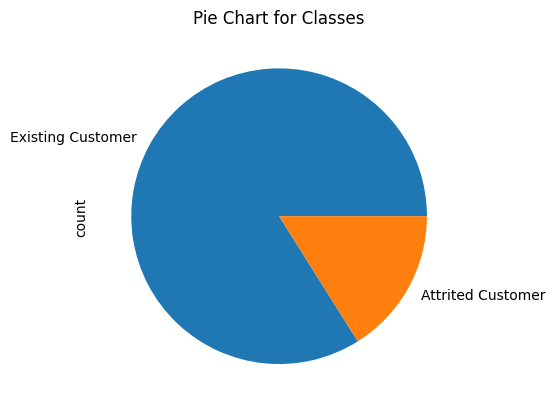

Does imbalance affect final performance of the model?
	 Yes! you're practicly injecting bias to the data and model will learn the distribution of the data as a feature to base classification on, which is NOT an intutitve feature to learn!
Solution?
	 1. Use weights 
	 2. Split Dataset in a balanced way(lose some)
	 3. Generate synthatic dataset
	 4. Data Augmentation
Before or After?
	 After! All the preprocessing should be after shuffling & splitting, you don't want any information about the distribution of train set bleed to test set


In [59]:
print('Atrrition Flag classes: ')
print('\t', *df['Attrition_Flag'].unique())

print('\n')

print(df['Attrition_Flag'].value_counts())


df['Attrition_Flag'].value_counts().plot.pie()
plt.title('Pie Chart for Classes')
plt.show()


print('Does imbalance affect final performance of the model?')
print("\t Yes! you're practicly injecting bias to the data and model will learn the distribution of the data as a feature to base classification on, which is NOT an intutitve feature to learn!")
print('Solution?')
print("\t 1. Use weights \n\t 2. Split Dataset in a balanced way(lose some)\n\t 3. Generate synthatic dataset\n\t 4. Data Augmentation")
print('Before or After?')
print("\t After! All the preprocessing should be after shuffling & splitting, you don't want any information about the distribution of train set bleed to test set")

<div dir=rtl>

داده های موجود در ویژگی Flag Atrrition را به عنوان خروجی انتخاب کرده و بقیه ویژگی ها را به عنوان داده ورودی درنظر
بگیرید. داده ها را با نسبت دلخواه به سه بخش آموزش، اعتبارسنجی و آزمون تقسیم کنید.سپس یک الگوریتم طبقه بندی
از کتابخانه scikitlearn  انتخاب کنید. سپس مدل را به اشکال زیر آموزش دهید

- بدون متعادل کردن داده ها، مدل خود را آموزش دهید.
-  یک الگوریتم متعادل سازی مجموعه داده را معرفی کرده و پس از متعادل کردن داده، مدل خود را آموزش دهید

</div>

## 1.6 Classification

### Normalizing the data

In [60]:
from sklearn.preprocessing import MinMaxScaler

target = dfclone['Attrition_Flag']
features = dfclone.drop('Attrition_Flag', axis = 1)

scaler = MinMaxScaler()

features= scaler.fit_transform(features)



### split into train validation an test

In [61]:
# Splitting
trainFeatures, testFeatures, trainTargets, testTargets = train_test_split(features, target, test_size = 0.2, random_state = 73)
testFeatures, validFeatures, testTargets, validTargets = train_test_split(testFeatures, testTargets, test_size = 0.5, random_state = 73)

### Training & evaluation

<Figure size 800x600 with 0 Axes>

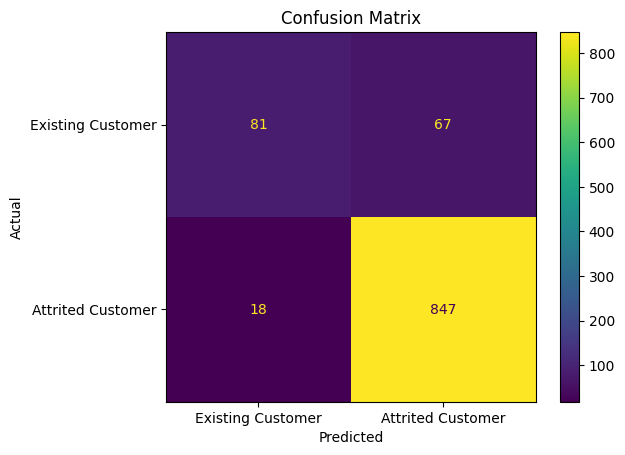

,Existing Customer,Attrited Customer,accuracy,macro avg,weighted avg
precision,0.818182,0.926696,0.916091,0.872439,0.910842
recall,0.547297,0.979191,0.916091,0.763244,0.916091
f1-score,0.655870,0.952220,0.916091,0.804045,0.908923
support,148.000000,865.000000,0.916091,1013.000000,1013.000000


In [62]:
# We use LR as Classifier
logRegClassifier = LogisticRegression(random_state = 0, n_jobs = -1, max_iter = 1000)
model = logRegClassifier.fit(trainFeatures, trainTargets)
# Evaluate the model
preds = model.predict(testFeatures)


# Calculate the confusion matrix
cm = confusion_matrix(testTargets, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Attrition_Flag'].unique())
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

pd.DataFrame(classification_report(testTargets, preds, target_names = df['Attrition_Flag'].unique(),output_dict=True))

	 > Model : RF Classifier


<Figure size 800x600 with 0 Axes>

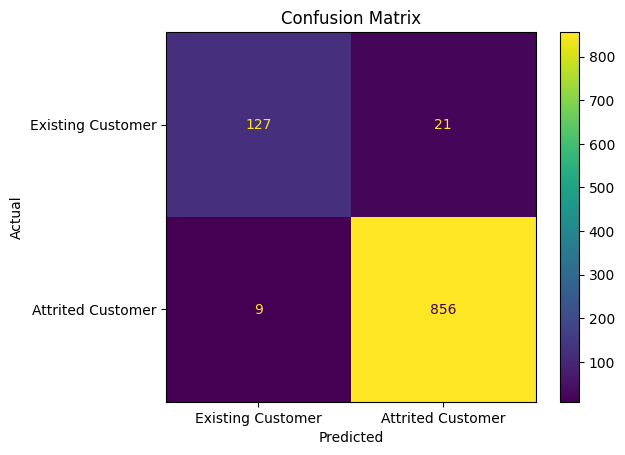

,Existing Customer,Attrited Customer,accuracy,macro avg,weighted avg
precision,0.933824,0.976055,0.970385,0.954939,0.969885
recall,0.858108,0.989595,0.970385,0.923852,0.970385
f1-score,0.894366,0.982778,0.970385,0.938572,0.969861
support,148.000000,865.000000,0.970385,1013.000000,1013.000000


In [63]:
# We use Random Forest as Classifier
print('\t > Model : RF Classifier')
rfClassifier = RandomForestClassifier(random_state = 0, n_jobs = -1)
model = rfClassifier.fit(trainFeatures, trainTargets)
# Evaluate the model
preds = model.predict(testFeatures)


# Calculate the confusion matrix
cm = confusion_matrix(testTargets, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Attrition_Flag'].unique())
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

pd.DataFrame(classification_report(testTargets, preds, target_names = df['Attrition_Flag'].unique(),output_dict=True))

<Figure size 800x600 with 0 Axes>

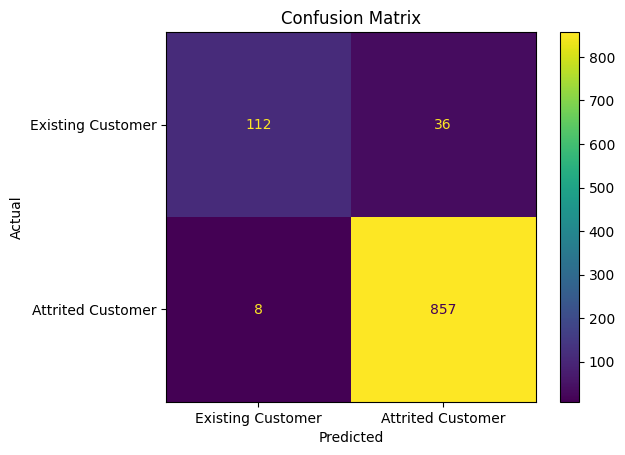

,Existing Customer,Attrited Customer,accuracy,macro avg,weighted avg
precision,0.933333,0.959686,0.956565,0.946510,0.955836
recall,0.756757,0.990751,0.956565,0.873754,0.956565
f1-score,0.835821,0.974972,0.956565,0.905396,0.954642
support,148.000000,865.000000,0.956565,1013.000000,1013.000000


In [64]:
rfClassifier = RandomForestClassifier(random_state = 0, n_jobs = -1,
                                      class_weight ="balanced")
model = rfClassifier.fit(trainFeatures, trainTargets)
# Evaluate the model
preds = model.predict(testFeatures)


# Calculate the confusion matrix
cm = confusion_matrix(testTargets, preds)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Attrition_Flag'].unique())
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

pd.DataFrame(classification_report(testTargets, preds, target_names = df['Attrition_Flag'].unique(),output_dict=True))

<div dir=rtl>

## امتیازی

بخش دوم پرسش اول را تکرار کنید با این تفاوت که این بار پخش داده را با توجه به کلاس های مختلف موجود در ویژگی
Attrition_Flag نمایش دهید.


</div>

['Existing Customer' 'Attrited Customer']


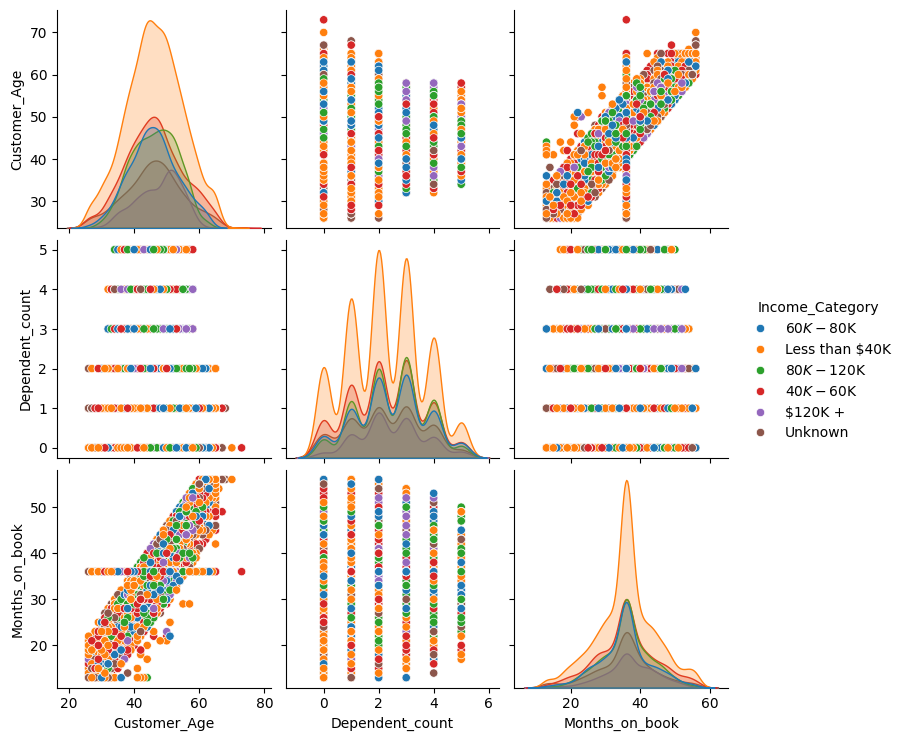

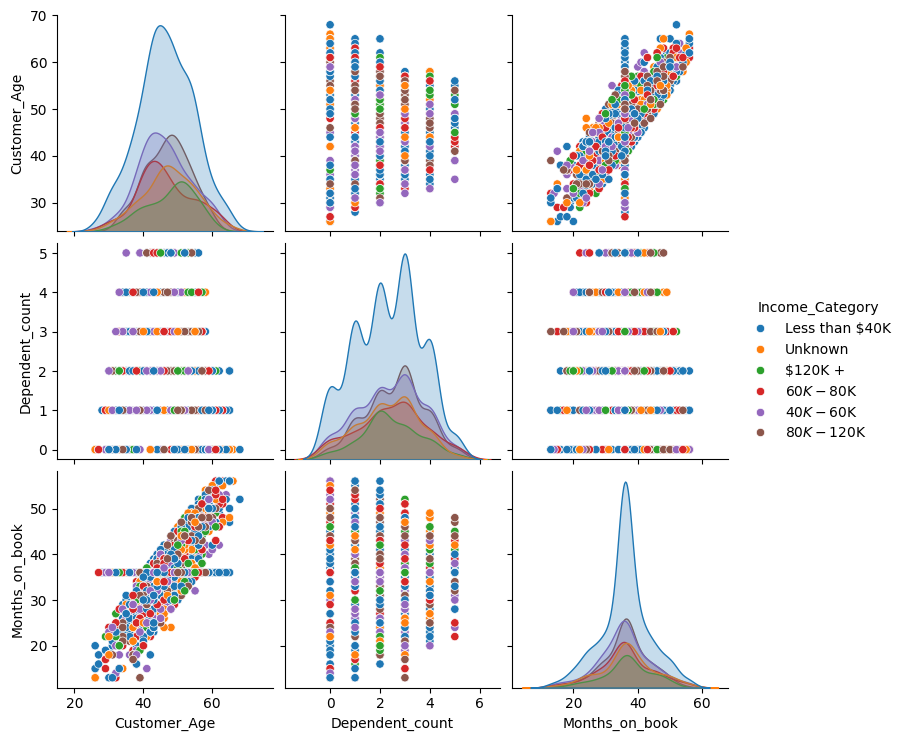

In [65]:
print(df["Attrition_Flag"].unique())
plot_columns= ['Customer_Age','Gender',"Dependent_count",
              "Education_Level","Marital_Status","Income_Category",
              "Card_Category","Months_on_book"]
sns.pairplot(df[plot_columns][df["Attrition_Flag"]=="Existing Customer"],hue="Income_Category")
sns.pairplot(df[plot_columns][df["Attrition_Flag"]=="Attrited Customer"],hue="Income_Category")

<div dir = rtl >

# پرسش دوم
داده شکل ۱ را درنظر بگیرید
(داده نشان داده شده در این [لینک](https://drive.google.com/file/d/1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK/view) موجود است.)

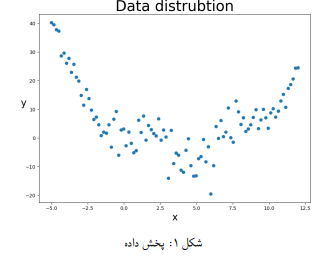

* **خواندن داده:** می‌توانید با استفاده از دستور `load.np()` داده‌ها را بخوانید.
* **نمایش نمودار خطا:** در تمامی مراحلی که مدل آموزش داده می‌شود، نمودار خطا برای داده‌های آموزش و آزمون  را نمایش دهید.
</div>

## Downloading the Data

In [66]:
import gdown
url = 'https://drive.google.com/uc?id=1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK'
output = "data.npy"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK
To: /content/data.npy
100%|██████████| 928/928 [00:00<00:00, 1.52MB/s]


'data.npy'

## Ploting the Data

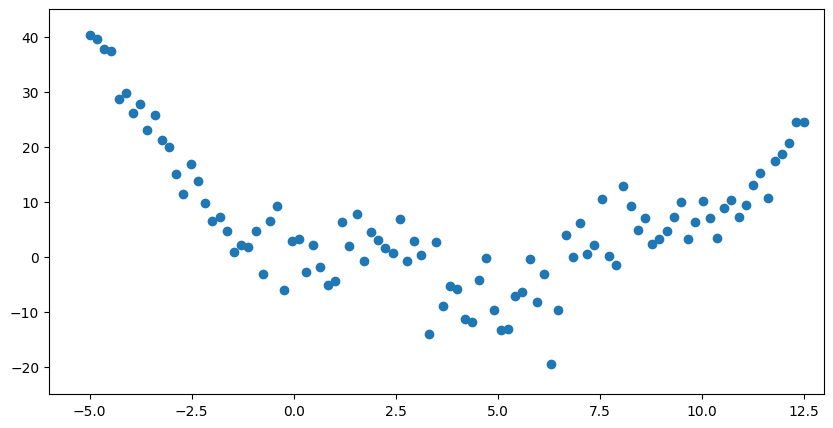

In [67]:
import numpy as np
import matplotlib.pyplot as plt

y = np.load('data.npy')
X = np.linspace(-5,12.5,len(y))
plt.figure(figsize=(10,5))
plt.axis([-6,13,-25,45])
plt.scatter(X,y)

---

<div dir=rtl>

مجموعه داده را به بخش های آموزش و آزمون تقسیم کنید و داده مربوط به هر یک از مجموعه داده ها را بر روی یک نمودار
نمایش دهید. مشخص کنید که کدام داده برای چه مجموعه داده ای است.

</div>

## 2.1 splitting data into train and test

20% is a common practice among data scientists for splitting data into training and testing sets.

for better leaerning here we normalize the data too



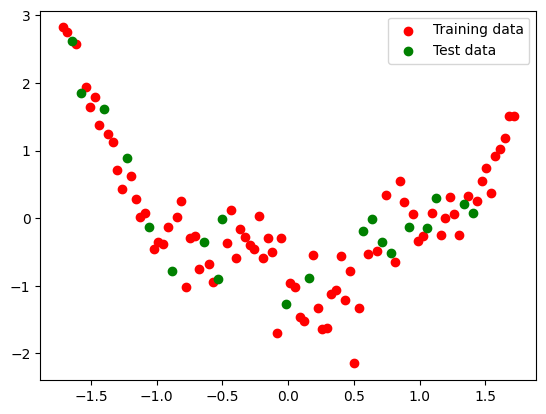

In [68]:
std = np.std(y)
mean = np.mean(y)
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

def normalize_inverse(data):
    return data * std + mean


y=normalize(y)
X=normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

plt.scatter(X_train,y_train, c = 'red')
plt.scatter(X_test,y_test, c = 'green')
plt.legend(['Training data','Test data'])

<div dir=rtl>

سه معیار برای سنجش عملکرد مدل های رگرسیون معرفی کنید و هر یک را توضیح دهید. در مراحلی که مدل خود را آموزش
می دهید، از این معیارها برای سنجش عملکرد مدل های خود استفاده نمایید.

</div>

## 2.2 Metrics we use

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def metrics(y_test, y_hat_test):
      y_test = normalize_inverse(y_test)
      y_hat_test = normalize_inverse(y_hat_test)


      mse = mean_squared_error(y_test, y_hat_test)

      mae = mean_absolute_error(y_test, y_hat_test)

      r2 = r2_score(y_test, y_hat_test)

      return mse,mae,r2



<div dir=rtl>

یک مدل رگرسیون خطی درجه اول (بدون استفاده از توابع آماده) روی داده مورد نظر آموزش دهید. به نظر شما آیا یک مدل
خطی درجه اول می تواند به خوبی داده مورد نظر را تخمین بزند؟ توضیح دهید.

</div>

## 2.3 traning the data with simple linnear regression

normalizing the data:

In [70]:
def my_linear_regression(X_train, X_test, y_train, y_test,epochs,lr,plot=True):
  if len(X_train.shape) == 1:
    N_FEATURES = 1
  else:
    N_FEATURES = X_train.shape[1]

  trainLoss = []
  testLoss = []
  w_hist = []
  b_hist = []
  dj_hist = []
  mse_list=[]
  mae_list=[]
  r2_list=[]

  np.random.seed(73)
  w = np.random.rand(1,N_FEATURES)*2 - 0.5

  np.random.seed(73)
  b = np.random.rand(1)*2 - 0.5

  for i in range(epochs):

      w_hist.append(w)
      b_hist.append(b)

      y_hat = np.zeros((y_train.shape[0],))
      y_hat_test = np.zeros((y_test.shape[0],))

      # Forward
      for d in range(y_hat.shape[0]):
          x = X_train[d]
          y_hat[d] = np.dot(w,x) + b


      # Error
      E = y_train-y_hat
      loss = 1/2 * np.dot(E,E) * (1/(len(y_train)))
      trainLoss.append(loss)

      # Test forward

      for d in range(y_hat_test.shape[0]):
          x = X_test[d]
          y_hat_test[d] = np.dot(w,x) + b

      # Test error and test loss

      E_test = y_test - y_hat_test
      e_test = 1/2 * np.dot(E_test,E_test)
      e_test *= 1/len(y_test)
      testLoss.append(e_test)

      # Update rule
      # w := w - eta * dj/dw = w - eta * sum[(y_hat - y)x]  = w + eta * sum[(y - y_hat)x]

      dj = np.dot(X_train.T,E)
      dj_hist.append(dj)
      w = w + lr*dj
      b = b + lr*np.sum(E)


    # Metrics
      mse, mae, r2 = metrics(y_test, y_hat_test)
      mse_list.append(mse)
      mae_list.append(mae)
      r2_list.append(r2)




  # Plot
  if plot:
    plt.figure(figsize=(15,4))

    plt.plot(trainLoss, marker='o',
                markerfacecolor = 'red',
                color = 'red')

    plt.plot(testLoss, marker='o',
                markerfacecolor = 'green',
                color = 'green')


    plt.title('Loss plot')
    plt.ylabel('Loss (MSE)/2')
    plt.xlabel('Epoch')
    plt.legend(["TrainLoss","TestLoss"])
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot( mse_list , 'b-', label='MSE',marker='o')
    plt.title('MSE')
    plt.figure()
    plt.plot( mae_list , 'g-', label='MAE',marker='o')
    plt.title('MAE')
    plt.figure()
    plt.plot( r2_list , 'r-', label='R2',marker='o')
    plt.title('R2')

    # Show the plot
    plt.grid(True)
    plt.show()


  b_hist = np.array(b_hist)
  w_hist = np.array(w_hist)
  cost_arr = np.array(trainLoss)
  return trainLoss, testLoss, w_hist, b_hist, dj_hist,mse_list, mae_list, r2_list

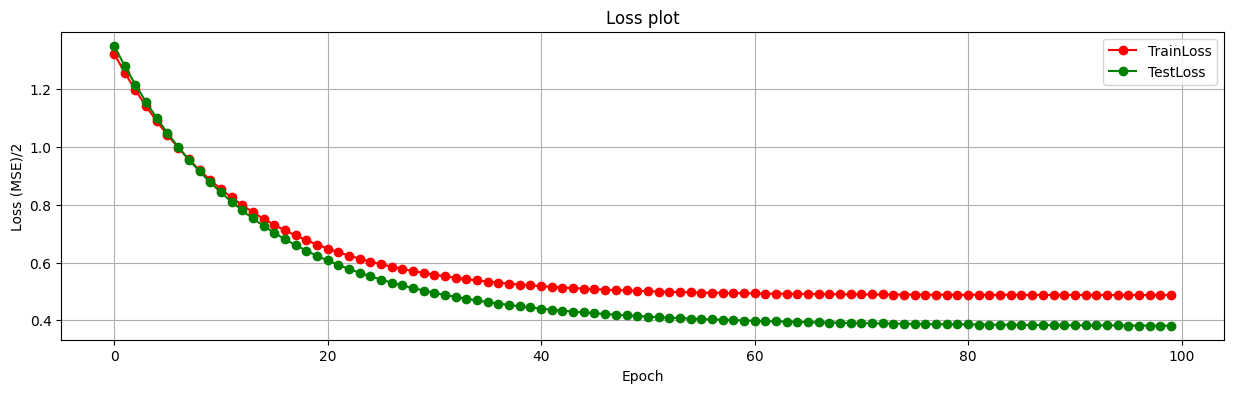

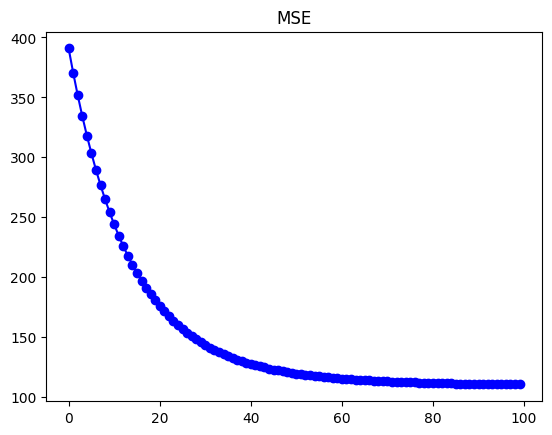

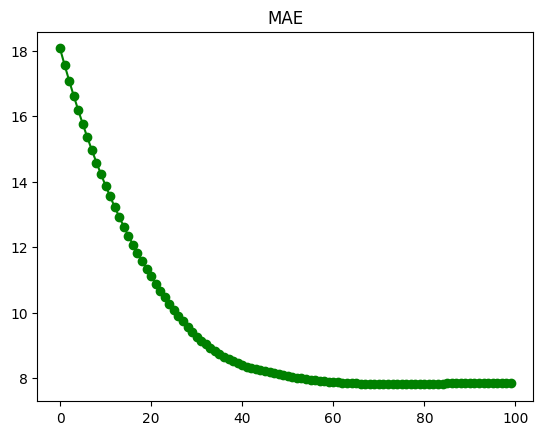

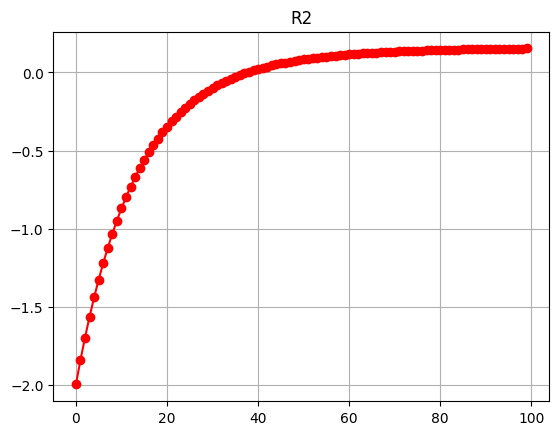

Mean Squared Error: 110.47769999771882
Mean Absolute Error: 7.850883170530267
R-squared: 0.15341972659595604


In [71]:
lr = 0.0005 #Learning Rate
epochs = 100
trainLoss, testLoss, w_hist, b_hist, dj_hist,mse_list, mae_list, r2_list= my_linear_regression(X_train, X_test, y_train, y_test,epochs,lr)
print("Mean Squared Error:", mse_list[-1])
print("Mean Absolute Error:", mae_list[-1])
print("R-squared:", r2_list[-1])

---

<div dir=rtl>

در این بخش، تعداد دور حلقه آموزش (Iteration) را ثابت در نظر بگیرید. در ابتدا برای آموزش مدل از تنها یک داده آموزش
استفاده کرده، مدل را آموزش داده و سپس مقادیر خطا برای داده آموزش و آزمون را ذخیره نمایید. در مرحله بعد یک داده به
داده آموزش اضافه کرده و روند قبلی را تکرار کنید تا این که در مرحله آخر با استفاده از تمامی داده های آموزش مدل را آموزش
دهید. نمودار خطا برای داده آزمون و آموزش را بر حسب تعداد داده آموزش رسم کنید. توضیح دهید با افزایش داده آموزش چه
اتفاقی برای خطاهای آزمون و آموزش می افتد.

</div>


## 2.4 Assesing the train data size impact on training

Text(0.5, 1.0, 'R2')

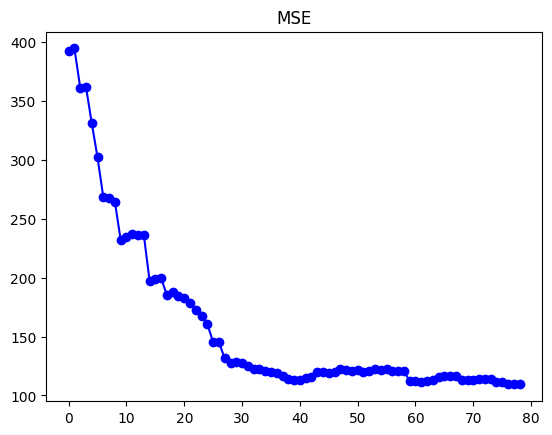

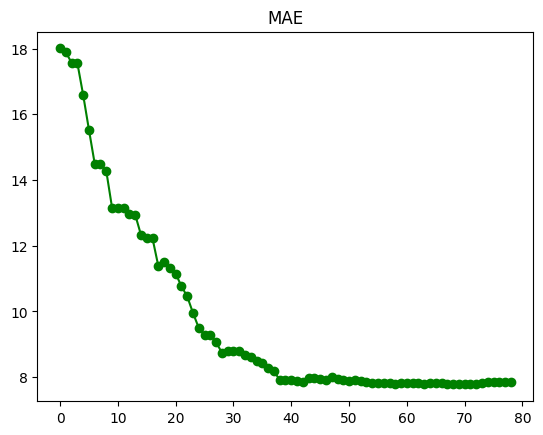

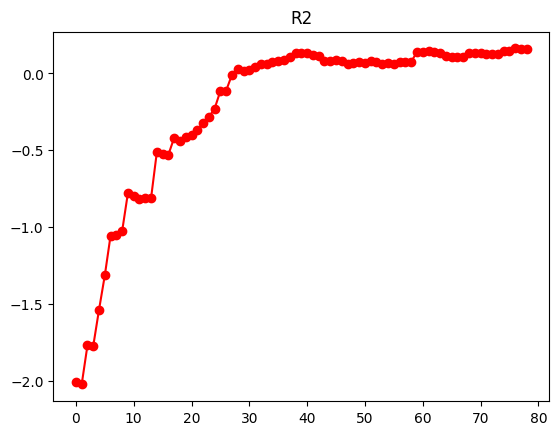

In [72]:
mse = []
mae = []
r2 = []

for  i in range(1,len(X_train)):

  xnew_train = X_train[:i]
  ynew_train = y_train[:i]

  trainLoss, testLoss, w_hist, b_hist, dj_hist,mse_list, mae_list, r2_list = my_linear_regression(xnew_train, X_test, ynew_train, y_test,epochs,lr,plot=False)
  mse.append(mse_list[-1])
  mae.append(mae_list[-1])
  r2.append(r2_list[-1])


plt.figure()
plt.plot( mse , 'b-', label='MSE',marker='o')
plt.title('MSE')
plt.figure()
plt.plot( mae , 'g-', label='MAE',marker='o')
plt.title('MAE')
plt.figure()
plt.plot( r2 , 'r-', label='R2',marker='o')
plt.title('R2')

<div dir=rtl>

به مدل رگرسیون خطی که در بخش قبل آموزش دادید، مرحله به مرحله یک جمله با درجه دلخواه اضافه کنید. این کار را حداقل برای ۵ جمله تکرار کنید.

- نمودار خطا بر حسب تعداد جملات چندجمله ای را نمایش دهید.

- آیا با افزایش تعداد جمله های مدل، خطای آزمون همواره کاهش میاید؟ توضیح دهید.

</div>

## 2.6 analysing different features impact on training

Text(0.5, 1.0, 'R2 vs. Polynomial Degree')

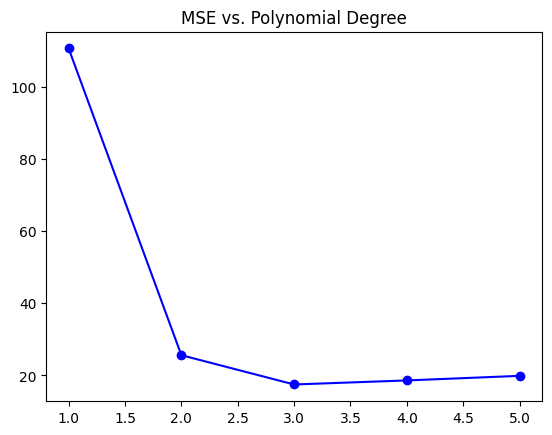

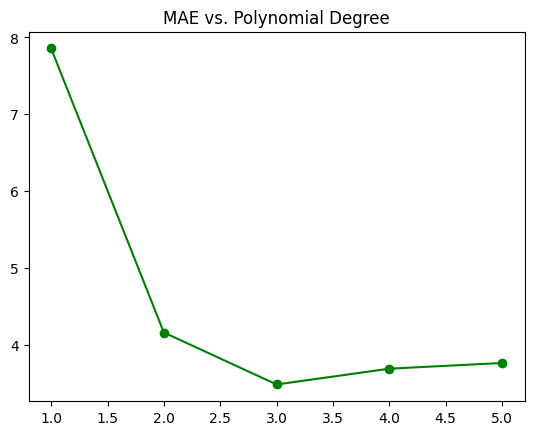

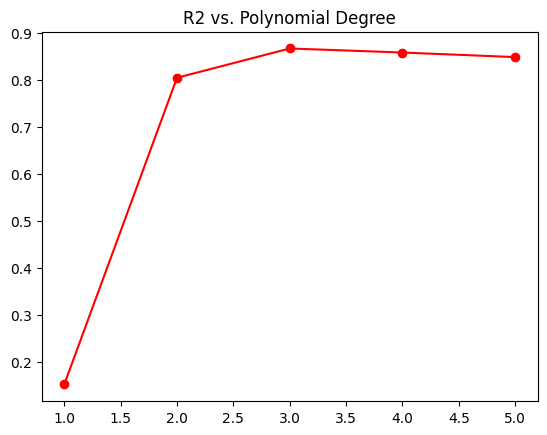

In [73]:
from sklearn.preprocessing import PolynomialFeatures
mse = []
mae = []
r2 = []


# Generating polynomial features for a given degree
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X.reshape(-1, 1))

degrees = range(1,6)


# Training and testing for polynomial degrees

train_losses = []
test_losses = []

for degree in degrees:
    # Generate polynomial features
    X_train_poly = generate_polynomial_features(X_train, degree)
    X_test_poly = generate_polynomial_features(X_test, degree)

    trainLoss, testLoss, w_hist, b_hist, dj_hist,mse_list, mae_list, r2_list = my_linear_regression(X_train_poly, X_test_poly, y_train, y_test,epochs,lr,plot=False)
    mse.append(mse_list[-1])
    mae.append(mae_list[-1])
    r2.append(r2_list[-1])


plt.figure()
plt.plot(degrees ,mse , 'b-', label='MSE', marker='o')
plt.title('MSE vs. Polynomial Degree')
plt.figure()
plt.plot(degrees , mae , 'g-', label='MAE',marker='o')
plt.title('MAE vs. Polynomial Degree')
plt.figure()
plt.plot(degrees , r2 , 'r-', label='R2',marker='o')
plt.title('R2 vs. Polynomial Degree')


<div dir=rtl>

ز میان الگوریتم های رگرسیون موجود در کتابخانه scikitlearn  به دلخواه ۳ الگوریتم را انتخاب کرده و به صورت خلاصه
آن ها را توضیح دهید. سپس از این سه الگوریتم برای آموزش مدل استفاده کرده و نتایج آن ها را با هم مقایسه کنید.

</div>

## 2.7 three ways of regression in scikit learn

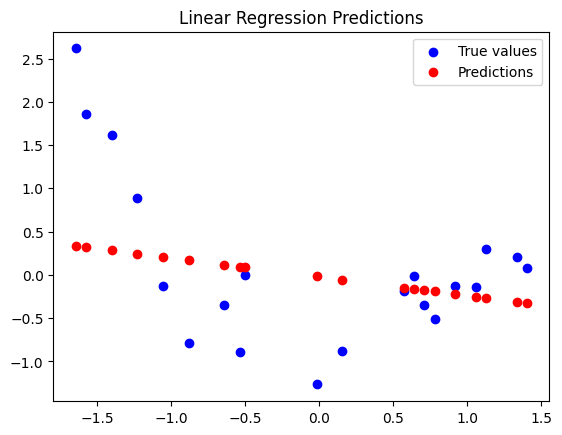

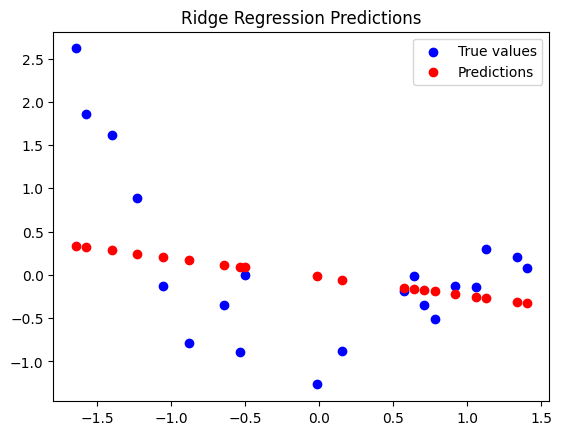

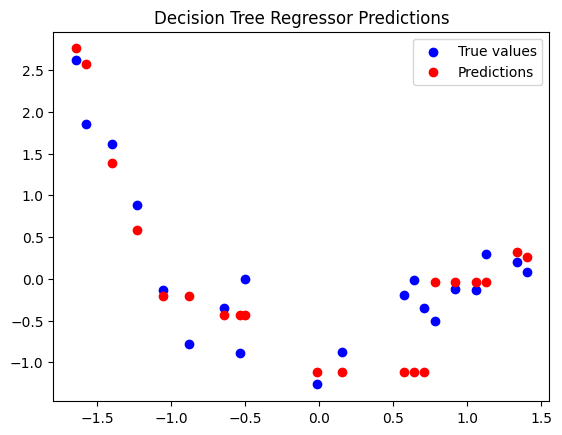

Linear Regression
 	Mean squared Error: 109.5645
 	Mean Absolute Error: 7.8723
 	R2: 0.1604
Ridge Regression
 	Mean squared Error: 109.5845
 	Mean Absolute Error: 7.8719
 	R2: 0.1603
Decision Tree Regressor
 	Mean squared Error: 33.1386
 	Mean Absolute Error: 4.5189
 	R2: 0.7461


,Linear Regression,Ridge Regression,Decision Tree Regressor
Mean squared Error,109.564462,109.584547,33.138647
Mean Absolute Error,7.872281,7.871944,4.518907
R2,0.160418,0.160264,0.746062


In [74]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train.reshape(-1, 1), y_train)

    y_pred = model.predict(X_test.reshape(-1, 1))


    results[name] = metrics(y_test, y_pred)

    plt.scatter(X_test, y_test, color="blue", label="True values")
    plt.scatter(X_test, y_pred, color="red", label="Predictions")
    plt.title(f"{name} Predictions")
    plt.legend()
    plt.show()

for name, [mse,mae,r2] in results.items():
    print(name,end="\n \t")
    print(f"Mean squared Error: {mse:.4f}",end="\n \t")
    print(f"Mean Absolute Error: {mae:.4f}",end="\n \t")
    print(f"R2: {r2:.4f}")

pd.DataFrame(results,index=["Mean squared Error","Mean Absolute Error","R2"])


## امتیازی

درباره reguralization تحقیق کنید و مدل چند جمله ای خود را با استفاده از reguralization دوباره آموزش دهید. (بدون
استفاده از توابع آماده)



In [75]:
def lambda_reguralization(X_train, X_test, y_train, y_test, epochs, lr, lambda_reg=0.01, plot=True):
    if len(X_train.shape) == 1:
        N_FEATURES = 1
    else:
        N_FEATURES = X_train.shape[1]

    trainLoss = []
    testLoss = []
    w_hist = []
    b_hist = []
    dj_hist = []
    mse_list = []
    mae_list = []
    r2_list = []

    np.random.seed(73)
    w = np.random.rand(1, N_FEATURES) * 2 - 0.5
    np.random.seed(73)
    b = np.random.rand(1) * 2 - 0.5

    for i in range(epochs):
        w_hist.append(w)
        b_hist.append(b)

        y_hat = np.zeros((y_train.shape[0],))
        y_hat_test = np.zeros((y_test.shape[0],))

        # Forward pass for train
        for d in range(y_hat.shape[0]):
            x = X_train[d]
            y_hat[d] = np.dot(w, x) + b

        # Training error with L2 regularization
        E = y_train - y_hat
        reg_term = (lambda_reg / 2) * np.sum(w ** 2)  # L2 penalty
        loss = (1 / (2 * len(y_train))) * np.dot(E, E) + reg_term
        trainLoss.append(loss)

        # Forward pass for test
        for d in range(y_hat_test.shape[0]):
            x = X_test[d]
            y_hat_test[d] = np.dot(w, x) + b

        # Test error
        E_test = y_test - y_hat_test
        test_loss = (1 / (2 * len(y_test))) * np.dot(E_test, E_test)
        testLoss.append(test_loss)

        # Gradient with L2 regularization
        dj = np.dot(X_train.T, E) / len(y_train) + lambda_reg * w
        dj_hist.append(dj)

        # Update weights and bias
        w = w + lr * dj
        b = b + lr * np.sum(E) / len(y_train)

        # Metrics
        mse, mae, r2 = metrics(y_test, y_hat_test)
        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)

    # Plot results
    if plot:
        plt.figure(figsize=(15, 4))
        plt.plot(trainLoss, marker='o', markerfacecolor='red', color='red', label="Train Loss")
        plt.plot(testLoss, marker='o', markerfacecolor='green', color='green', label="Test Loss")
        plt.title('Loss plot with Regularization')
        plt.ylabel('Loss (MSE)/2')
        plt.xlabel('Epoch')
        plt.legend()
        plt.grid()
        plt.show()

        plt.figure()
        plt.plot(mse_list, 'b-', label='MSE',marker='o')
        plt.title('MSE')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.plot(mae_list, 'g-', label='MAE',marker='o')
        plt.title('MAE')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.plot(r2_list, 'r-', label='R2',marker='o')
        plt.title('R2')
        plt.grid(True)
        plt.show()

    b_hist = np.array(b_hist)
    w_hist = np.array(w_hist)
    cost_arr = np.array(trainLoss)
    return trainLoss, testLoss, w_hist, b_hist, dj_hist, mse_list, mae_list, r2_list


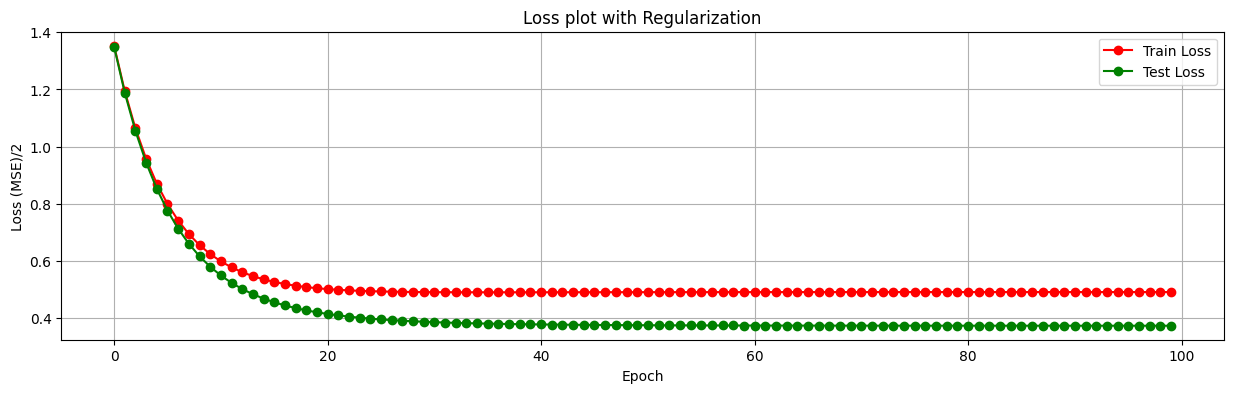

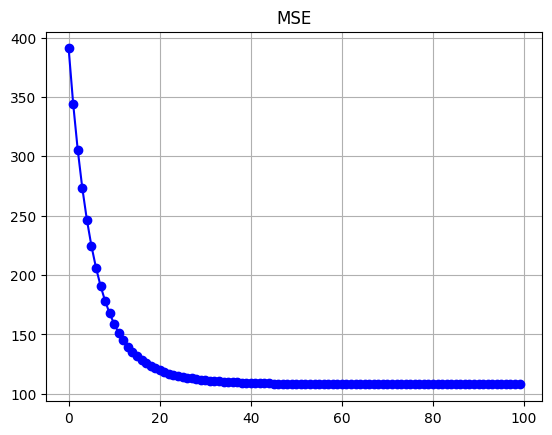

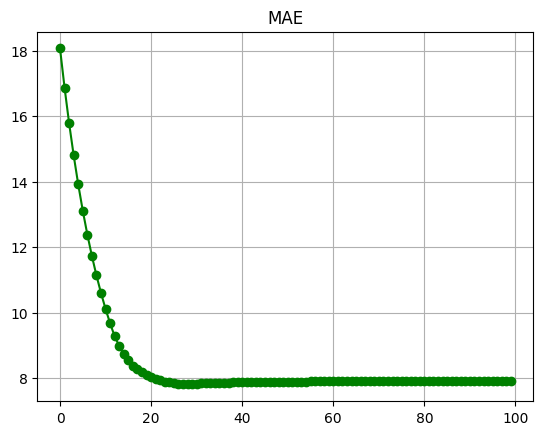

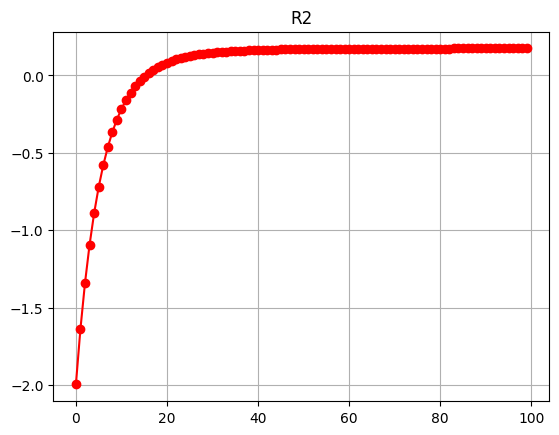

In [76]:
train_loss, test_loss, w_hist, b_hist, dj_hist, mse, mae, r2 = lambda_reguralization(
    X_train, X_test, y_train, y_test,
    epochs=100,
    lr=0.1,
    lambda_reg=0.1,
    plot=True
)


In [77]:
import pandas as pd

epochs = 100
lr = 0.01
lambda_reg = 0.1



# Train using my_linear_regression (no regularization)
_, testLoss_no_reg, w_hist_no_reg, _, _, mse_no_reg, mae_no_reg, r2_no_reg = my_linear_regression(
    X_train, X_test, y_train, y_test, epochs=epochs, lr=lr, plot=False
)

# Train using lambda_reguralization (with L2 regularization)
_, testLoss_reg, w_hist_reg, _, _, mse_reg, mae_reg, r2_reg = lambda_reguralization(
    X_train, X_test, y_train, y_test, epochs=epochs, lr=lr, lambda_reg=lambda_reg, plot=False
)

# Extract final weights and performance metrics
results = {
    "Model": ["Without Regularization", "With Regularization"],
    "Final Weight": [w_hist_no_reg[-1].item(), w_hist_reg[-1].item()],
    "MSE": [mse_no_reg[-1], mse_reg[-1]],
    "MAE": [mae_no_reg[-1], mae_reg[-1]],
    "R²": [r2_no_reg[-1], r2_reg[-1]],
    "Loss": [testLoss_no_reg[-1], testLoss_reg[-1]]
}

# Convert to a DataFrame for easy visualization
results_df = pd.DataFrame(results)



results_df


,Model,Final Weight,MSE,MAE,R²,Loss
0,Without Regularization,-0.218110,109.564462,7.872281,0.160418,0.378354
1,With Regularization,0.176334,163.229207,10.363928,-0.250810,0.563671
